In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.tree import DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [83]:
# !pip install graphviz
import graphviz

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [85]:
# from sklearn.preprocessing import StandardScaler

In [86]:
from sklearn import tree

In [87]:
from sklearn.metrics import root_mean_squared_error

In [88]:
import scipy.io as sio

In [89]:
import sys
import os

# Load Trjectories DataSet

In [90]:
#sys.path.append(os.path.abspath('../'))
#sys.path

os.path.abspath('../')+'/'

'/home/devunivaq/ResearchTasks/Approximate_BiSimulation_Relation_With_Regression_Tree/'

In [369]:
ParentDirectory = os.path.abspath('../') + '/'

path_of_data_folder = ParentDirectory + 'MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/' #'/home/devunivaq//ResearchTasks/Approximate_BiSimulation_Relation/MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/'
data_file_name = 'navigation_trejectory_dataset.csv'


#path_of_data_folder = ParentDirectory + 'MatlabCode/CaseStudy_Simulation/RoomHeatingSystem/DataFiles/'
#data_file_name = 'RoomHeating_trejectory_dataset.csv'




In [370]:
numberOfAttributes = 2
numberOfClassVariables = 2
attributes_columns_names = []
class_columns_names = []
for i in range(numberOfAttributes):
    attributes_columns_names.append('X'+str(i+1))
for i in range(numberOfClassVariables):
    class_columns_names.append('C'+str(i+1))
all_column_names = attributes_columns_names + class_columns_names
all_column_names

['X1', 'X2', 'C1', 'C2']

In [371]:

# df = pd.read_csv('/Users/khalilulrehman/Academic/Phd Italy 2023_26/University of LAquila/Research Papers tasks/MatlabCodes/RegressionTree/CaseStudies/RoomHeatingBenchmark/RoomHeating_trejectory_dataset_test.csv', names=["X1", "X2", "X3", "T1","T2", "T3" ]);
df = pd.read_csv(path_of_data_folder + data_file_name, names=all_column_names);

df.head()


,X1,X2,C1,C2
0,0.68739,0.45289,0.69869,0.45201
1,0.69869,0.45201,0.72001,0.45043
2,0.72001,0.45043,0.75021,0.44834
3,0.75021,0.44834,0.78829,0.44586
4,0.78829,0.44586,0.83334,0.44312


In [372]:
X = df[attributes_columns_names]
y = df[class_columns_names]
print(X.shape)
print(y.shape)

(22198, 2)
(22198, 2)


In [373]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [374]:

print(X_train.shape)
print(y_train.shape)


(17758, 2)
(17758, 2)


In [375]:
print(X_test.shape)
print(y_test.shape)

(4440, 2)
(4440, 2)


In [376]:
# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

# Check for infinite values
print("Inf values in X_train:", np.isinf(X_train).sum())
print("Inf values in y_train:", np.isinf(y_train).sum())

NaN values in X_train: X1    0
X2    0
dtype: int64
NaN values in y_train: C1    0
C2    0
dtype: int64
Inf values in X_train: X1    0
X2    0
dtype: int64
Inf values in y_train: C1    0
C2    0
dtype: int64


## Traning the Decision Tree Regressor

In [377]:
dt_regressor = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [2, 3, 5, 6, 7, 8, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}
grid_search = GridSearchCV(
    estimator=dt_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    error_score='raise'  # Raise an exception if a fit fails
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

Best Parameters: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [378]:
 # DTR = best_estimator
#For navigation min_samples_leaf=100
# For Room Heating min_samples_leaf=1000
DTR = DecisionTreeRegressor( max_leaf_nodes=7   ) # old parameters--> max_leaf_nodes = 128 min_samples_leaf=100, max_depth = 2

DTR.fit(X_train, y_train)
y_train_hat = DTR.predict(X_train)
print("RMSE on Traning Data")
print(root_mean_squared_error(y_train, y_train_hat));
print("RMSE on Testing Data")
y_test_hat = DTR.predict(X_test)
print(root_mean_squared_error(y_test, y_test_hat));

RMSE on Traning Data
0.2874797294717883
RMSE on Testing Data
0.28964367000961333


In [379]:
def normalized_root_mean_square_error(y, y_hat):
    """
    Calculate the Normalized Root Mean Square Error (NRMSE) between y and y_hat,
    normalized by the mean of y.

    Parameters:
    y (numpy.ndarray): Actual values.
    y_hat (numpy.ndarray): Predicted values.

    Returns:
    float: The NRMSE value normalized by the mean of y.
    """
    # Ensure y and y_hat are numpy arrays
    y = np.array(y)
    y_hat = np.array(y_hat)
    
    # Calculate the RMSE
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    
    # Normalize by the mean of the actual values
    mean_y = np.mean(y)
    
    # Handle the case where mean_y is zero to avoid division by zero
    if mean_y == 0:
        raise ValueError("The mean of y is zero, which would lead to division by zero in NRMSE calculation.")
    
    nrmse = rmse / mean_y
    
    return nrmse

In [380]:
print("% NRMSE on Traning Data")
print(normalized_root_mean_square_error(y_train, y_train_hat) * 100);
print("% NRMSE on Testing Data")
print(normalized_root_mean_square_error(y_test, y_test_hat) * 100);

% NRMSE on Traning Data
18.557443877811362
% NRMSE on Testing Data
18.786051151398755


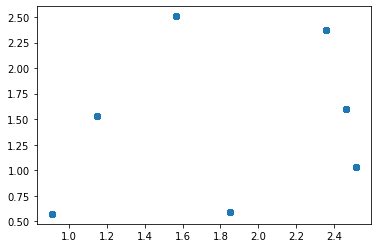

In [381]:
plt.scatter(y_train_hat[:,0], y_train_hat[:,1])
plt.show()

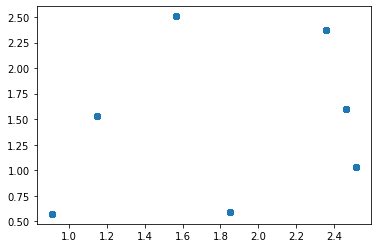

In [382]:
plt.scatter(y_test_hat[:,0], y_test_hat[:,1])
plt.show()

In [383]:
# tree.plot_tree(DTR)

## Tree Visulization

In [384]:
# Visualize the decision tree
dot_data = export_graphviz(DTR, out_file=None, 
                                feature_names= attributes_columns_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(path_of_data_folder + "decision_tree_maxL_7")  # This will save the tree to a file
graph.view()  # This will open the tree in a viewer

'/home/devunivaq/ResearchTasks/Approximate_BiSimulation_Relation_With_Regression_Tree/MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/decision_tree_maxL_7.pdf'

## Information Extraction From Tree

In [385]:
print("Total Nodes = " + str(DTR.tree_.node_count))
print("Total Features = " + str(DTR.tree_.n_features))

Total Nodes = 13
Total Features = 2


In [386]:
# Get leaf nodes for each sample
leaf_nodes = DTR.apply(X_train)

# Group samples by leaf node
leaf_samples = {leaf: np.where(leaf_nodes == leaf)[0] for leaf in np.unique(leaf_nodes)}

In [387]:
leaf_samples.keys()

dict_keys([3, 7, 8, 9, 10, 11, 12])

In [388]:
print("Number of Leaves = "  +  str(len(leaf_samples.keys())))


Number of Leaves = 7


# Updated constraint canculation function is below

In [389]:


def get_leaf_constraints(tree, X, leaf_samples):
    """
    Extracts feature constraints (min/max) for each leaf node based on decision tree splits.
    Falls back to dataset min/max **only when necessary** (if any constraint is still infinite).
    
    Parameters:
        tree: Trained DecisionTreeRegressor model.
        X: Feature dataset (NumPy array or Pandas DataFrame).
        leaf_samples: Dictionary mapping leaf node IDs to the list of row indices in X that reach that leaf.

    Returns:
        feature_constraints: Dictionary mapping leaf nodes to feature constraints {feature: (min, max)}.
    """
    tree_ = tree.tree_
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize dictionary to store feature constraints for each leaf
    feature_constraints = {}

    # Initialize stack for tree traversal (start from root node with no constraints)
    stack = [(0, {i: (-np.inf, np.inf) for i in range(n_features)})]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # If it's a leaf node
            if node_id in leaf_samples and len(leaf_samples[node_id]) > 0:
                X_leaf = X[leaf_samples[node_id], :]  # Extract subset of X that reaches this leaf
                
                # Initialize final constraints for this leaf using inherited constraints
                final_constraints = constraints.copy()

                for i in range(n_features):
                    leaf_min = X_leaf[:, i].min()
                    leaf_max = X_leaf[:, i].max()

                    # Update only the missing constraints
                    current_min, current_max = final_constraints[i]
                    
                    if current_min == -np.inf:
                        final_constraints[i] = (leaf_min, current_max)
                    if current_max == np.inf:
                        final_constraints[i] = (final_constraints[i][0], leaf_max)

                feature_constraints[node_id] = final_constraints

        else:  # Internal node, continue traversal
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (
                left_constraints[feature][0], 
                min(left_constraints[feature][1], threshold)
            )
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (
                max(left_constraints[feature][0], threshold), 
                right_constraints[feature][1]
            )
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(DTR, X_train, leaf_samples)

In [390]:
# Print the results
for leaf, indices in leaf_samples.items():
    print(f"Leaf {leaf}:")
    print(f"  Samples: {indices.tolist()}")
    print(f"  Constraints:")
    for feature, (min_val, max_val) in leaf_constraints[leaf].items():
        print(f"    Feature {feature}: min = {min_val}, max = {max_val}")
    print()

Leaf 3:
  Samples: [10, 13, 14, 17, 29, 46, 48, 52, 53, 56, 57, 59, 61, 65, 69, 70, 77, 82, 84, 85, 86, 88, 90, 92, 93, 109, 112, 114, 117, 120, 121, 122, 124, 126, 136, 140, 147, 150, 157, 162, 166, 169, 172, 178, 179, 187, 195, 197, 198, 204, 208, 218, 219, 222, 223, 226, 230, 232, 234, 241, 242, 245, 248, 252, 253, 254, 256, 257, 260, 263, 275, 287, 293, 297, 299, 301, 302, 303, 304, 306, 313, 321, 329, 330, 332, 333, 344, 348, 349, 357, 358, 367, 369, 379, 385, 389, 392, 406, 420, 422, 427, 428, 429, 436, 443, 444, 449, 458, 460, 464, 465, 468, 469, 471, 473, 474, 476, 481, 482, 492, 496, 498, 500, 501, 502, 507, 511, 512, 518, 521, 522, 523, 527, 529, 534, 543, 546, 553, 555, 558, 560, 561, 566, 572, 577, 581, 586, 588, 598, 605, 607, 608, 610, 611, 612, 618, 619, 620, 621, 623, 631, 635, 650, 651, 658, 670, 672, 674, 675, 676, 679, 681, 682, 692, 704, 707, 710, 716, 719, 722, 728, 735, 737, 740, 743, 744, 745, 746, 753, 759, 763, 768, 772, 774, 775, 795, 796, 801, 805, 810, 821, 

In [391]:
final_df = pd.DataFrame(columns=["Leaf"]+all_column_names)
final_df.head()

,Leaf,X1,X2,C1,C2


In [392]:
leaf_counter = 1
for leaf, indices in leaf_samples.items():
    tempOneDf = pd.concat( [X_train.iloc[indices.tolist()], y_train.iloc[indices.tolist()]], axis=1,)
    tempOneDf["Leaf"] = leaf_counter 
    # print(tempOneDf.shape)
    final_df = pd.concat([final_df, tempOneDf], ignore_index=True)
    # final_df
    leaf_counter = leaf_counter + 1
final_df.shape

/tmp/ipykernel_146278/2707120113.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, tempOneDf], ignore_index=True)


(17758, 5)

In [393]:
final_df.head()

,Leaf,X1,X2,C1,C2
0,1,0.62603,0.34037,0.68761,0.33730
1,1,0.39159,0.89965,0.41440,0.85350
2,1,1.16960,0.61430,1.25290,0.61181
3,1,0.38137,0.26395,0.39268,0.26306
4,1,0.46962,0.94852,0.52085,0.94559


In [394]:

# final_df.to_csv(file_name, sep='\t', encoding='utf-8', index=False, header=False)
final_df.to_csv(path_of_data_folder + 'leaf_classified_trejectory_dataset.csv', index=False, header=False)



## Test Sample Per Laef Extraction and saving

In [395]:
# Get leaf nodes for each sample
leaf_nodes = DTR.apply(X_test)

# Group samples by leaf node
leaf_test_samples = {leaf: np.where(leaf_nodes == leaf)[0] for leaf in np.unique(leaf_nodes)}

In [396]:
final_test_df = pd.DataFrame(columns=["Leaf"]+all_column_names)
final_test_df.head()
leaf_counter = 1
for leaf, indices in leaf_test_samples.items():
    tempOneDf = pd.concat( [X_test.iloc[indices.tolist()], y_test.iloc[indices.tolist()]], axis=1,)
    tempOneDf["Leaf"] = leaf_counter 
    # print(tempOneDf.shape)
    final_test_df = pd.concat([final_test_df, tempOneDf], ignore_index=True)
    # final_df
    leaf_counter = leaf_counter + 1
print("Shape of test" + str(final_test_df.shape))
print(final_test_df.head())
# final_df.to_csv(file_name, sep='\t', encoding='utf-8', index=False, header=False)
final_test_df.to_csv(path_of_data_folder + "leaf_classified_test_trejectory_dataset.csv", index=False, header=False)



Shape of test(4440, 5)
  Leaf       X1       X2       C1       C2
0    1  1.40090  0.53083  1.49050  0.52888
1    1  1.41080  0.13081  1.49190  0.12819
2    1  0.33961  0.36148  0.36981  0.35938
3    1  0.37044  0.96035  0.38371  0.89463
4    1  0.65276  0.31332  0.72589  0.31037


/tmp/ipykernel_146278/3870780191.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_test_df = pd.concat([final_test_df, tempOneDf], ignore_index=True)


In [397]:
# For constraints export - 2D Array - each row for leaf and in columns 
# we have "X1_min","X1_max", "Y1_min", "Y1_max", "X2_min", "X2_max", "Y2_min", "Y2_max"
constrants_array = []
for leaf, indices in leaf_samples.items():
    # print(f"Leaf {leaf}:")
    # print(f"  Samples: {indices.tolist()}")
    print(f"  Constraints:")
    constrants_on_leaf = []
    for feature, (min_val, max_val) in leaf_constraints[leaf].items():
        print(f"    Feature {feature}: min = {min_val}, max = {max_val}")
        constrants_on_leaf.append(min_val)
        constrants_on_leaf.append(max_val)
    print()
    constrants_array.append(constrants_on_leaf)
# constrants_array

  Constraints:
    Feature 0: min = 0.01521, max = 1.4327500462532043
    Feature 1: min = 0.049347, max = 1.3102499842643738

  Constraints:
    Feature 0: min = 1.8314500451087952, max = 2.9522
    Feature 1: min = 1.3102499842643738, max = 2.0541499853134155

  Constraints:
    Feature 0: min = 1.8314500451087952, max = 2.9334
    Feature 1: min = 2.0541499853134155, max = 2.9996

  Constraints:
    Feature 0: min = 1.4327500462532043, max = 2.093850016593933
    Feature 1: min = 0.040461, max = 1.3102499842643738

  Constraints:
    Feature 0: min = 2.093850016593933, max = 2.9575
    Feature 1: min = 0.90456, max = 1.3102499842643738

  Constraints:
    Feature 0: min = 0.005715, max = 1.8314500451087952
    Feature 1: min = 1.3102499842643738, max = 1.9593999981880188

  Constraints:
    Feature 0: min = 1.0295, max = 1.8314500451087952
    Feature 1: min = 1.9593999981880188, max = 2.9994



In [398]:

np.savetxt(path_of_data_folder + 'constrants_array_on_leaves.csv',constrants_array,delimiter=",")



## Update Complete here

## Main Code finish Here

## Main Code Finised Here

In [ ]:

# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, X, leaf_samples):
    """
    Extracts the feature constraints (min/max) for each leaf node using dataset X.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize min/max values from dataset
    # global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    # print(global_min_max)
    
    feature_constraints = {}

    # Stack-based traversal of the tree
    stack = [(0, global_min_max.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            feature_constraints[node_id] = constraints
            # print(node_id)
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

                            
            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], min(left_constraints[feature][1], threshold))
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (max(right_constraints[feature][0], threshold), right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(DTR, X_train, leaf_samples)

In [141]:
# This function gives the min and max of the constraintes with comparison. I think i need the main threshold instead of min and max

# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, X):
    """
    Extracts the feature constraints (min/max) for each leaf node using dataset X.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize min/max values from dataset
    # global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    # print(global_min_max)
    
    feature_constraints = {}

    # Stack-based traversal of the tree
    stack = [(0, global_min_max.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            feature_constraints[node_id] = constraints
            # print(node_id)
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], min(left_constraints[feature][1], threshold))
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (max(right_constraints[feature][0], threshold), right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
# leaf_constraints = get_leaf_constraints(DTR, X_train)

In [218]:
DTR.tree_.children_left[1]

2

In [ ]:

# constraints or boundries based on traning data
# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, X, leaf_samples):
    """
    Extracts the feature constraints (min/max) for each leaf node using dataset X.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize min/max values from dataset
    # global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    # print(global_min_max)
    
    feature_constraints = {}

    # Stack-based traversal of the tree
    stack = [(0, global_min_max.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            constraints = {i: (X[leaf_samples[node_id], i].min(), X[leaf_samples[node_id], i].max()) for i in range(n_features)}
            feature_constraints[node_id] = constraints
            # print(node_id)
            # test = {i: (X[leaf_samples[node_id], i].min(), X[leaf_samples[node_id], i].max()) for i in range(n_features)}
            # print(test)
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], threshold)
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (threshold, right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(DTR, X_train,leaf_samples)

In [51]:
type(leaf_samples)
leaf_samples.keys
# for key in leaf_samples:
#     print (key)
X_Train.iloc[leaf_samples[2]]
Y_Train.iloc[leaf_samples[2]]
# leaf_samples[2]

,T1,T2
0,0.42443,0.61354
1,0.42467,0.61352
2,0.42502,0.61349
3,0.42549,0.61345
4,0.42607,0.61340
...,...,...
2153,1.05700,0.37922
2154,1.06510,0.37747
2155,1.07310,0.37573
2156,1.08120,0.37402


  Constraints:
    Feature 0: min = 0.00041855, max = 0.5101650059223175
    Feature 1: min = -0.056612, max = 0.29745499789714813

  Constraints:
    Feature 0: min = 0.00041855, max = 0.3315500020980835
    Feature 1: min = 0.29745499789714813, max = 0.6208550035953522

  Constraints:
    Feature 0: min = 0.3315500020980835, max = 0.5101650059223175
    Feature 1: min = 0.29745499789714813, max = 0.6208550035953522

  Constraints:
    Feature 0: min = 0.5101650059223175, max = 0.854324996471405
    Feature 1: min = -0.056612, max = 0.16622500121593475

  Constraints:
    Feature 0: min = 0.5101650059223175, max = 0.854324996471405
    Feature 1: min = 0.16622500121593475, max = 0.3229999989271164

  Constraints:
    Feature 0: min = 0.5101650059223175, max = 0.6786850094795227
    Feature 1: min = 0.3229999989271164, max = 0.6208550035953522

  Constraints:
    Feature 0: min = 0.6786850094795227, max = 0.854324996471405
    Feature 1: min = 0.3229999989271164, max = 0.49963499605655

[[0.00041855, 0.5101650059223175, -0.056612, 0.29745499789714813],
 [0.00041855, 0.3315500020980835, 0.29745499789714813, 0.6208550035953522],
 [0.3315500020980835,
  0.5101650059223175,
  0.29745499789714813,
  0.6208550035953522],
 [0.5101650059223175, 0.854324996471405, -0.056612, 0.16622500121593475],
 [0.5101650059223175,
  0.854324996471405,
  0.16622500121593475,
  0.3229999989271164],
 [0.5101650059223175,
  0.6786850094795227,
  0.3229999989271164,
  0.6208550035953522],
 [0.6786850094795227,
  0.854324996471405,
  0.3229999989271164,
  0.4996349960565567],
 [0.6786850094795227,
  0.854324996471405,
  0.4996349960565567,
  0.6208550035953522],
 [0.00041855, 0.26362499594688416, 0.6208550035953522, 1.0230000019073486],
 [0.26362499594688416,
  0.462335005402565,
  0.6208550035953522,
  0.8467249870300293],
 [0.26362499594688416,
  0.462335005402565,
  0.8467249870300293,
  1.0230000019073486],
 [0.00041855, 0.462335005402565, 1.0230000019073486, 1.306950032711029],
 [0.46233500

In [95]:
leaf_constraints[2].items()

KeyError: 2

# Code completed Here

In [347]:
# import packages 
import pandas as pd 
import numpy as np 

# create dataframe 
df = pd.DataFrame({'Name': {0: 'Ram', 1: 'Deep', 2: 'Yash', 3: 'Aman', 4: 'Akash'}, 
				'Marks': {0: 68, 1: 87, 2: 45, 3: 78, 4: 56}}) 


# view dataframe 
print("Initial dataframe") 
display(df) 

testdf = df.iloc[[2,3]]
testdf['Pass'] 
# adding column with constant value 
df['Pass'] = True

# view dataframe 
print("Final dataframe") 
display(df) 


Initial dataframe


,Name,Marks
0,Ram,68
1,Deep,87
2,Yash,45
3,Aman,78
4,Akash,56


Final dataframe


/var/folders/2c/43cmhyln2s972415_6w44bhh0000gn/T/ipykernel_75654/2886168207.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.loc[[2,3],'Pass'] = True


,Name,Marks
0,Ram,68
1,Deep,87
2,Yash,45
3,Aman,78
4,Akash,56


In [233]:
node_indicator = DTR.decision_path(X_Train)
leaf_id = DTR.apply(X_Train)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:



KeyError: (0, 1)

In [201]:
node_depth[2]

2

In [225]:
n_nodes = DTR.tree_.node_count
print("Number of Total Nodes = " + str(n_nodes))
feature = DTR.tree_.feature
print("Features = " + str(feature))
threshold = DTR.tree_.threshold
threshold

DTR.tree_.n_node_samples
DTR.get_n_leaves()
path_Matrix = DTR.decision_path(X_Train)
# print(path_Matrix)
path_Matrix(1, 2)

Number of Total Nodes = 7
Features = [ 1  0 -2 -2  2 -2 -2]


TypeError: 'csr_matrix' object is not callable

In [157]:
n_nodes = DTR.tree_.node_count
children_left = DTR.tree_.children_left
children_right = DTR.tree_.children_right
feature = DTR.tree_.feature
threshold = DTR.tree_.threshold
values = DTR.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=np.around(values[i], 3)
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=np.around(values[i], 3),
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node with value=[[1.727]
 [1.324]]: go to node 1 if X[:, 1] <= 1.1758999824523926 else to node 4.
	node=1 is a split node with value=[[1.304]
 [0.754]]: go to node 2 if X[:, 0] <= 1.1840500235557556 else to node 3.
		node=2 is a leaf node with value=[[0.644]
 [0.747]].
		node=3 is a leaf node with value=[[1.743]
 [0.758]].
	node=4 is a split node with value=[[2.241]
 [2.015]]: go to node 5 if X[:, 2] <= 2.295199990272522 else to node 6.
		node=5 is a leaf node with value=[[1.765]
 [2.146]].
		node=6 is a leaf node with value=[[2.695]
 [1.891]].


In [163]:
node_indicator = DTR.decision_path(X_Train)
leaf_id = DTR.apply(X_Train)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:



IndexError: index 1 is out of bounds for axis 1 with size 1

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Sample dataset (replace with your actual dataset)
X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
y = np.random.rand(100, 2)  # 2D target variable

# Train Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)

# Get leaf nodes for each sample
leaf_nodes = tree.apply(X)

# Group samples by leaf node
leaf_samples = {leaf: np.where(leaf_nodes == leaf)[0] for leaf in np.unique(leaf_nodes)}

# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, feature_names=None):
    """
    Extracts the feature constraints (min/max) for each leaf node.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    feature_constraints = {}  # Stores constraints for each leaf
    
    # Dictionary to keep track of min/max for each feature
    min_max_constraints = {i: (-np.inf, np.inf) for i in range(tree_.n_features)}

    # Stack-based traversal of the tree
    stack = [(0, min_max_constraints.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            feature_constraints[node_id] = constraints
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]
            
            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], threshold)
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (threshold, right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints

# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(tree)

# Print the results
for leaf, indices in leaf_samples.items():
    print(f"Leaf {leaf}:")
    print(f"  Samples: {indices.tolist()}")
    print(f"  Constraints:")
    for feature, (min_val, max_val) in leaf_constraints[leaf].items():
        print(f"    Feature {feature}: min = {min_val}, max = {max_val}")
    print()


Leaf 4:
  Samples: [2, 6, 13, 16, 19, 25, 28, 31, 33, 35, 38, 41, 45, 50, 65, 66, 68, 70, 73, 74, 76, 77, 78, 80, 83, 89, 90, 93]
  Constraints:
    Feature 0: min = -inf, max = 3.2483408451080322
    Feature 1: min = -inf, max = 8.135478019714355

Leaf 5:
  Samples: [0, 1, 3, 8, 10, 11, 17, 18, 20, 23, 26, 29, 30, 34, 36, 37, 42, 47, 49, 51, 52, 53, 55, 59, 60, 62, 64, 67, 71, 72, 75, 81, 82, 85, 86, 87, 91, 94, 95, 96, 99]
  Constraints:
    Feature 0: min = 3.2483408451080322, max = 8.598616600036621
    Feature 1: min = -inf, max = 8.135478019714355

Leaf 7:
  Samples: [5, 14, 15, 21, 22, 24, 32, 43, 57, 58, 69, 79, 97, 98]
  Constraints:
    Feature 0: min = -inf, max = 8.598616600036621
    Feature 1: min = 8.135478019714355, max = 9.579225540161133

Leaf 8:
  Samples: [4, 9]
  Constraints:
    Feature 0: min = -inf, max = 8.598616600036621
    Feature 1: min = 9.579225540161133, max = inf

Leaf 10:
  Samples: [7]
  Constraints:
    Feature 0: min = 8.598616600036621, max = 8.696

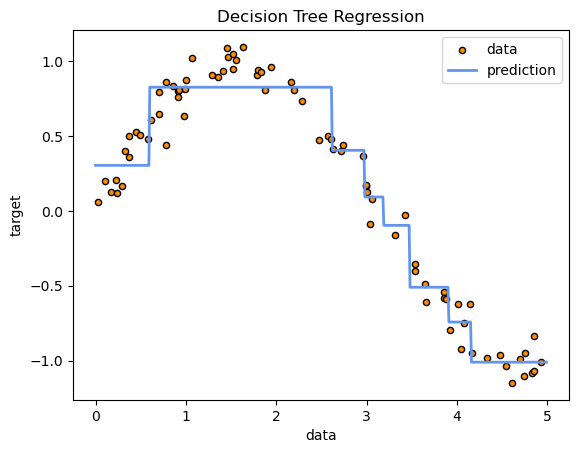

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# Create a simple dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Train the DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

# Visualize the decision tree
dot_data = export_graphviz(regressor, out_file=None, 
                           feature_names=['Feature'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # This will save the tree to a file
graph.view()  # This will open the tree in a viewer

# Plot the results
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()